In [343]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import sys

print(sys.version)
print(torch.__version__)

3.9.13 (main, Oct 13 2022, 21:15:33) 
[GCC 11.2.0]
1.12.1.post201


In [344]:
# import torch
# import torchvision
# import torchvision.transforms as transforms
# import numpy as np
# import matplotlib.pyplot as plt
# import sys

###data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


batch_size = 200
###train dataset download
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
###specifies the mini batch unit
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
###test dataset download
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
###specifies the mini batch unit
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # get some random training images
# dataiter = iter(trainloader)
# images, labels = next(dataiter)

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Files already downloaded and verified
Files already downloaded and verified


In [345]:
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([200, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([200]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

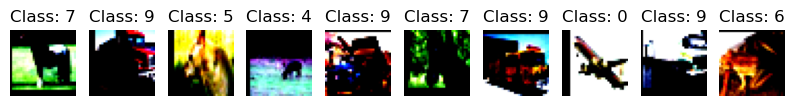

In [346]:
###데이터 확인
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1,2,0)))
    plt.title('Class: ' +str(y_train[i].item()))

In [347]:
###CNN model
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels = 32, kernel_size = 5, padding = 1, stride = 1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels = 64, kernel_size = 3, padding = 1, stride = 1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels = 128, kernel_size = 3, padding = 1, stride = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm1d(500)
        
        self.fc = nn.Linear(3*3*128, 500)
        self.fc1 = nn.Linear(500, 10)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)        
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 3*3*128 )
        x = self.fc(x)
      
        x = self.bn4(x)
        x = self.fc1(x)        
        x =  F.softmax(x, dim=1)
        
        return x


net = Net()

In [348]:
import torch.optim as optim

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:


model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=0.01)


print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=1152, out_features=500, bias=True)
  (fc1): Linear(in_features=500, out_features=10, bias=True)
)


In [349]:
###evaluate model
import sys

def evaluate(model, testloader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in testloader:
            image = image.to(device)
            label = label.to(device)
            
            output = model(image)
            
            test_loss += criterion(output, label).item()
            #print(test_loss)
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
        
    test_loss /= (len(testloader.dataset) / batch_size)
    
    
    test_accuracy = 100. * correct / len(testloader.dataset)
    return output, test_loss, test_accuracy

In [350]:
###check the performance
def train(model, trainloader, optimizer, testloader, log_interval):
    model.train()
    correct = 0
    for batch_idx, (image, label) in enumerate(trainloader):
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        prediction = output.max(1, keepdim = True)[1]
        correct += prediction.eq(label.view_as(prediction)).sum().item()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {}  [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(epoch, batch_idx * len(image),
                                                                                  len(trainloader.dataset), 100. * batch_idx / len(trainloader),
                                                                                  loss.item()))
            
            
    train_accuracy = 100. * correct / len(trainloader.dataset)        
    TEST_output, test_loss, test_accuracy = evaluate(model, testloader)
    return loss.item(), TEST_output, test_loss, train_accuracy, test_accuracy

In [351]:
###result
train_losses = []   
test_losses = [] 
train_acc = []
test_acc = []

for epoch in range(100):
   
    train_loss, TEST_output, test_loss, train_accuracy,test_accuracy = 
    train(model, trainloader, optimizer, testloader,log_interval = 200)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    
    #output, test_loss, test_accuracy = evaluate(model, testloader)
    test_losses.append(test_loss)
    test_acc.append(test_accuracy)
    
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %,\tTraining Accuracy: {:.2f} % \n"
          .format(epoch, test_loss, test_accuracy, train_accuracy))
    

Train Epoch: 0  [0/50000 (0%)]	Train Loss: 2.309216
Train Epoch: 0  [40000/50000 (80%)]	Train Loss: 2.180025

[EPOCH: 0], 	Test Loss: 2.1192, 	Test Accuracy: 36.71,	Training Accuracy: 27.09 % 

Train Epoch: 1  [0/50000 (0%)]	Train Loss: 2.143792
Train Epoch: 1  [40000/50000 (80%)]	Train Loss: 2.070580

[EPOCH: 1], 	Test Loss: 2.0547, 	Test Accuracy: 43.35,	Training Accuracy: 38.38 % 

Train Epoch: 2  [0/50000 (0%)]	Train Loss: 2.082647
Train Epoch: 2  [40000/50000 (80%)]	Train Loss: 2.068962

[EPOCH: 2], 	Test Loss: 2.0106, 	Test Accuracy: 47.53,	Training Accuracy: 43.23 % 

Train Epoch: 3  [0/50000 (0%)]	Train Loss: 2.069436
Train Epoch: 3  [40000/50000 (80%)]	Train Loss: 2.021997

[EPOCH: 3], 	Test Loss: 1.9826, 	Test Accuracy: 50.93,	Training Accuracy: 46.60 % 

Train Epoch: 4  [0/50000 (0%)]	Train Loss: 1.993334
Train Epoch: 4  [40000/50000 (80%)]	Train Loss: 1.970375

[EPOCH: 4], 	Test Loss: 1.9540, 	Test Accuracy: 54.17,	Training Accuracy: 49.15 % 

Train Epoch: 5  [0/50000 (0%)]

Train Epoch: 42  [0/50000 (0%)]	Train Loss: 1.766161
Train Epoch: 42  [40000/50000 (80%)]	Train Loss: 1.767615

[EPOCH: 42], 	Test Loss: 1.7436, 	Test Accuracy: 76.50,	Training Accuracy: 75.47 % 

Train Epoch: 43  [0/50000 (0%)]	Train Loss: 1.777087
Train Epoch: 43  [40000/50000 (80%)]	Train Loss: 1.749285

[EPOCH: 43], 	Test Loss: 1.7462, 	Test Accuracy: 76.54,	Training Accuracy: 76.00 % 

Train Epoch: 44  [0/50000 (0%)]	Train Loss: 1.746512
Train Epoch: 44  [40000/50000 (80%)]	Train Loss: 1.753945

[EPOCH: 44], 	Test Loss: 1.7466, 	Test Accuracy: 76.79,	Training Accuracy: 76.26 % 

Train Epoch: 45  [0/50000 (0%)]	Train Loss: 1.729723
Train Epoch: 45  [40000/50000 (80%)]	Train Loss: 1.712925

[EPOCH: 45], 	Test Loss: 1.7520, 	Test Accuracy: 76.51,	Training Accuracy: 76.67 % 

Train Epoch: 46  [0/50000 (0%)]	Train Loss: 1.735783
Train Epoch: 46  [40000/50000 (80%)]	Train Loss: 1.726545

[EPOCH: 46], 	Test Loss: 1.7350, 	Test Accuracy: 77.25,	Training Accuracy: 76.75 % 

Train Epoch: 47

Train Epoch: 84  [0/50000 (0%)]	Train Loss: 1.712541
Train Epoch: 84  [40000/50000 (80%)]	Train Loss: 1.718867

[EPOCH: 84], 	Test Loss: 1.7079, 	Test Accuracy: 82.30,	Training Accuracy: 82.94 % 

Train Epoch: 85  [0/50000 (0%)]	Train Loss: 1.750326
Train Epoch: 85  [40000/50000 (80%)]	Train Loss: 1.727961

[EPOCH: 85], 	Test Loss: 1.7125, 	Test Accuracy: 81.47,	Training Accuracy: 83.00 % 

Train Epoch: 86  [0/50000 (0%)]	Train Loss: 1.688420
Train Epoch: 86  [40000/50000 (80%)]	Train Loss: 1.701031

[EPOCH: 86], 	Test Loss: 1.7125, 	Test Accuracy: 81.84,	Training Accuracy: 83.00 % 

Train Epoch: 87  [0/50000 (0%)]	Train Loss: 1.713111
Train Epoch: 87  [40000/50000 (80%)]	Train Loss: 1.723349

[EPOCH: 87], 	Test Loss: 1.7068, 	Test Accuracy: 81.93,	Training Accuracy: 83.06 % 

Train Epoch: 88  [0/50000 (0%)]	Train Loss: 1.732428
Train Epoch: 88  [40000/50000 (80%)]	Train Loss: 1.716899

[EPOCH: 88], 	Test Loss: 1.7181, 	Test Accuracy: 80.51,	Training Accuracy: 82.96 % 

Train Epoch: 89

In [340]:
print(len(train_losses))

print(len(test_losses))

100
100


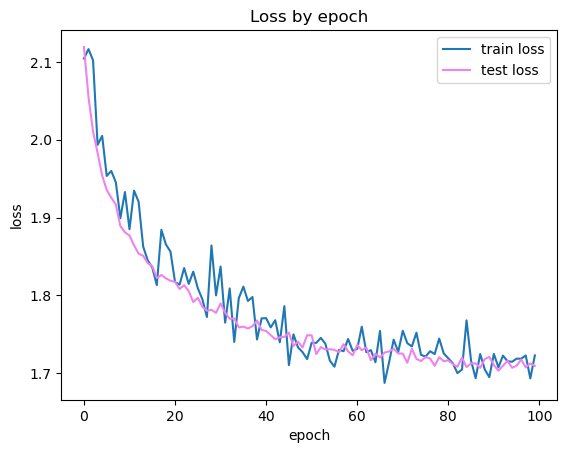

In [352]:

    
# x = train_losses
# y = test_losses
# plt.plot(x,y)
# plt.show()
# epoch = 0

# for epoch in range(99):
   

plt.plot(np.arange(0,100,1), train_losses, label='train loss')
plt.plot(np.arange(0, 100,1), test_losses, 'violet', label='test loss')
plt.title('Loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()



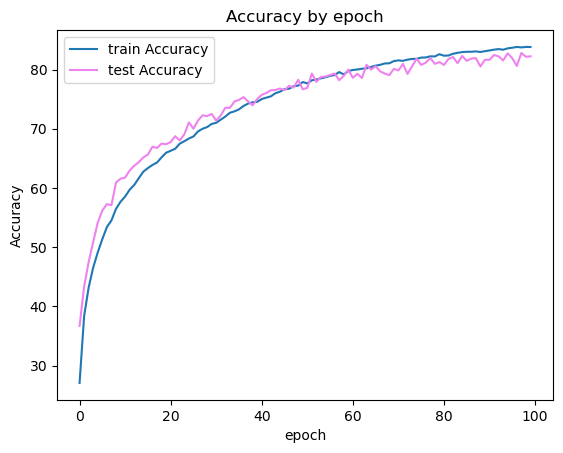

In [353]:
plt.plot(np.arange(0,100,1), train_acc, label='train Accuracy')
plt.plot(np.arange(0,100,1), test_acc, 'violet', label='test Accuracy')
plt.title('Accuracy by epoch')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
##############################################################################
loss_list =[]

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            
            running_loss = 0.0
    
    loss_list.append(loss)            
        
print('Finished Training')
print(loss_list)

[1,  2000] loss: 0.728
[1,  4000] loss: 0.759
[1,  6000] loss: 0.783
[1,  8000] loss: 0.798
[1, 10000] loss: 0.800
[1, 12000] loss: 0.806
[2,  2000] loss: 0.702
[2,  4000] loss: 0.733
[2,  6000] loss: 0.739
[2,  8000] loss: 0.776
[2, 10000] loss: 0.782
[2, 12000] loss: 0.780
[3,  2000] loss: 0.659
[3,  4000] loss: 0.732
[3,  6000] loss: 0.732
[3,  8000] loss: 0.749
[3, 10000] loss: 0.748
[3, 12000] loss: 0.770
[4,  2000] loss: 0.655
[4,  4000] loss: 0.675
[4,  6000] loss: 0.731
[4,  8000] loss: 0.742
[4, 10000] loss: 0.713
[4, 12000] loss: 0.774
[5,  2000] loss: 0.640
[5,  4000] loss: 0.691
[5,  6000] loss: 0.682
[5,  8000] loss: 0.713
[5, 10000] loss: 0.717
[5, 12000] loss: 0.756
[6,  2000] loss: 0.604
[6,  4000] loss: 0.656
[6,  6000] loss: 0.661
[6,  8000] loss: 0.719
[6, 10000] loss: 0.745
[6, 12000] loss: 0.740
[7,  2000] loss: 0.614
[7,  4000] loss: 0.646
[7,  6000] loss: 0.673
[7,  8000] loss: 0.710
[7, 10000] loss: 0.708
[7, 12000] loss: 0.697
[8,  2000] loss: 0.624
[8,  4000] 

In [36]:
loss_list[0].item()

1.4652607440948486

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

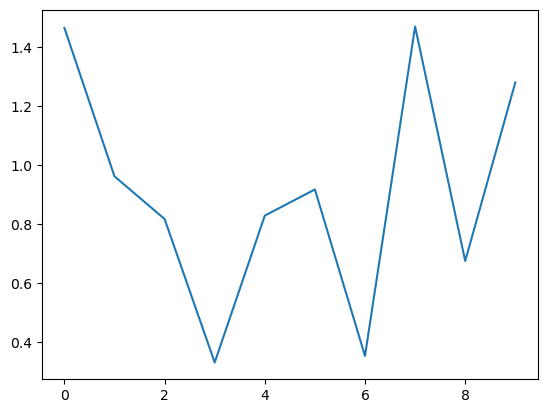

In [38]:
loss_item = []           
for i in loss_list:
    loss_item.append(i.item())
    
x = range(len(loss_item))
y = loss_item
plt.plot(x,y)
plt.show()

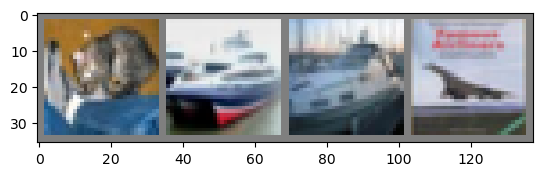

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
outputs = net(images)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   car   plane plane


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [ ]:
# correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [17]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
inputs, labels = data[0].to(device), data[1].to(device)

In [358]:
#########################################################################
import numpy as np

L2 = [0.0430, 0.0601, 0.0968, 0.0793, 0.0408, 0.0772, 0.0806, 0.1356, 0.0779, 0.0439, 0.0685, 0.1050, 0.0414, 0.0763, 0.0637]
LPIPS = [1.5477,2.0069, 1.9701, 1.8554, 1.7142, 2.0303, 2.0665, 2.3078, 1.8457, 1.6996, 1.7909, 2.2111, 1.5429, 1.6944, 1.5551]
Cosine = [0.6331, 1.0205, 0.9540, 0.8767, 0.3848, 1.0676,1.0160, 1.1586, 1.2189, 0.7652, 1.0429, 0.7801, 0.5508, 0.8222, 0.5357]

print(np.mean(L2))
print(np.std(L2))

print(np.mean(LPIPS))
print(np.std(LPIPS))

print(np.mean(Cosine))
print(np.std(Cosine))

0.07267333333333334
0.025446609903001925
1.8559066666666664
0.23084598174733062
0.85514
0.2378026991716733
